In [25]:
from matplotlib import pyplot as plt
from torch import nn
import torch
from torch.nn import BCELoss
from torch.optim import Adam

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]
epochs = 1000


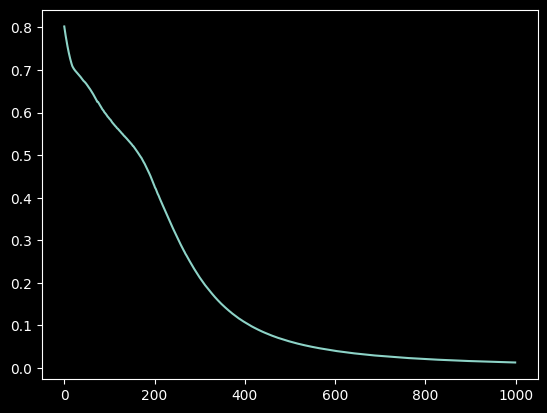

[[0.03031721]
 [0.99281267]
 [0.99303723]
 [0.00637971]]


In [27]:
class OfficialModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = torch.nn.Linear(2, 2, dtype=torch.double)
        self.hidden2 = torch.nn.Linear(2, 1, dtype=torch.double)
        self.activation = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        return x


model = OfficialModel()
loss_fn = BCELoss()
optimizer = Adam(model.parameters(), lr = 0.01)
losses = []

for epoch in range(epochs):
    x_tensor = torch.tensor(x, dtype=torch.double)
    y_tensor = torch.tensor(y, dtype=torch.double)
    optimizer.zero_grad()

    y_hat = model(x_tensor).squeeze()
    loss = loss_fn(y_hat, y_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

plt.plot(losses)
plt.show()

print(model(torch.tensor(x, dtype=torch.double)).detach().numpy())